# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [118]:
import pandas as pd

df = pd.pandas.read_csv("craftcans.csv")

In [119]:
df.tail()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.30%,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.00%,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85
2415,Dale's Pale Ale,Oskar Blues Brewery,"Longmont, CO",American Pale Ale (APA),12 oz.,6.50%,65


## Read in the file `craftcans.csv`, and look at the first first rows

In [120]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


## How many rows do you have in the data? What are the column types?

In [121]:
df.info


<bound method DataFrame.info of                           Beer              Brewery         Location  \
0                 Get Together    NorthGate Brewing  Minneapolis, MN   
1                Maggie's Leap    NorthGate Brewing  Minneapolis, MN   
2                   Wall's End    NorthGate Brewing  Minneapolis, MN   
3                      Pumpion    NorthGate Brewing  Minneapolis, MN   
4                   Stronghold    NorthGate Brewing  Minneapolis, MN   
...                        ...                  ...              ...   
2411  Mama's Little Yella Pils  Oskar Blues Brewery     Longmont, CO   
2412        GUBNA Imperial IPA  Oskar Blues Brewery     Longmont, CO   
2413                  Old Chub  Oskar Blues Brewery     Longmont, CO   
2414         Gordon Ale (2009)  Oskar Blues Brewery     Longmont, CO   
2415           Dale's Pale Ale  Oskar Blues Brewery     Longmont, CO   

                               Style    Size    ABV IBUs  
0                       American IPA  16 oz.

In [122]:
df.describe()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
count,2416,2410,2410,2405,2410,2348,2410
unique,2306,551,401,99,16,74,108
top,Nonstop Hef Hop,Brewery Vivant,"Grand Rapids, MI",American IPA,12 oz.,5.00%,Does not apply
freq,12,62,66,424,1507,215,1005


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [123]:
df.groupby('Style')['Brewery'].value_counts().head(10)

Style             Brewery                            
Abbey Single Ale  Destihl Brewery                        2
Altbier           Center of the Universe Brewing C...    2
                  Long Trail Brewing Company             2
                  Alaskan Brewing Company                1
                  Bohemian Brewery                       1
                  Cheboygan Brewing Company              1
                  Grimm Brothers Brewhouse               1
                  Hops & Grain Brewery                   1
                  Occidental Brewing Company             1
                  Sun King Brewing Company               1
Name: count, dtype: int64

In [124]:
df['Size'].value_counts().head(30)

Size
12 oz.               1507
16 oz.                814
24 oz.                 21
16 oz. Alumi-Tek®      15
12 oz                  14
19.2 oz.               14
16 oz                  12
32 oz.                  5
16.9 oz.                1
12 OZ.                  1
12 oz. Slimline         1
12 ounce                1
24 oz. "Silo Can"       1
12 & 16 oz.             1
19.2                    1
8.4 oz.                 1
Name: count, dtype: int64

In [125]:
df['Size'] = df['Size'].replace({'12': '12 oz'})

In [126]:
df['Size'].value_counts().head(30)

Size
12 oz.               1507
16 oz.                814
24 oz.                 21
16 oz. Alumi-Tek®      15
12 oz                  14
19.2 oz.               14
16 oz                  12
32 oz.                  5
16.9 oz.                1
12 OZ.                  1
12 oz. Slimline         1
12 ounce                1
24 oz. "Silo Can"       1
12 & 16 oz.             1
19.2                    1
8.4 oz.                 1
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [127]:
df['ABV'].value_counts().head(30)

ABV
5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
7.00%     92
4.50%     89
4.80%     72
5.80%     66
5.60%     66
5.10%     62
5.30%     60
4.90%     59
6.20%     59
8.00%     57
4.70%     57
6.80%     52
5.70%     52
5.40%     50
7.50%     43
4.00%     38
6.30%     38
4.20%     38
7.20%     37
9.90%     35
5.90%     34
4.60%     32
6.90%     32
8.50%     26
6.70%     25
Name: count, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [128]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [129]:
df['ABV'] = df['ABV'].str.replace("%", "").astype(float)


In [ ]:
#Random somethons

In [97]:
df['ABV'].value_counts().head(30)

ABV
5.0    215
5.5    158
6.0    125
6.5    123
5.2    107
7.0     92
4.5     89
4.8     72
5.8     66
5.6     66
5.1     62
5.3     60
4.9     59
6.2     59
8.0     57
4.7     57
6.8     52
5.7     52
5.4     50
7.5     43
4.0     38
6.3     38
4.2     38
7.2     37
9.9     35
5.9     34
4.6     32
6.9     32
8.5     26
6.7     25
Name: count, dtype: int64

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [130]:
df['ABV'].astype(float)

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [131]:
df['ABV'].astype(float).describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

In [132]:
df['ABV'].astype(float).median

<bound method Series.median of 0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64>

In [133]:
df['ABV'].astype(float).mean

<bound method Series.mean of 0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64>

<Axes: >

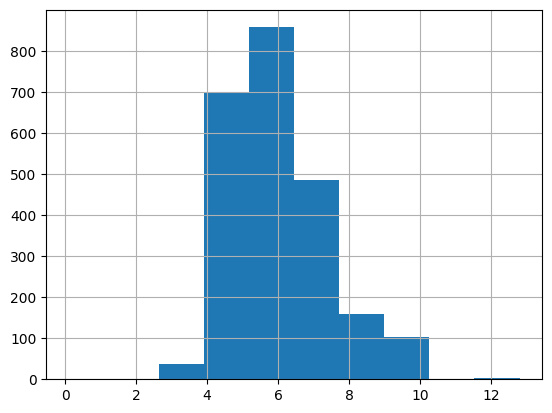

In [134]:
df['ABV'].astype(float).hist()

In [139]:
df['ABV'].astype(float).notnull().value_counts()

ABV
True     2348
False      68
Name: count, dtype: int64

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [142]:
df['Location'].describe

<bound method NDFrame.describe of 0       Minneapolis, MN
1       Minneapolis, MN
2       Minneapolis, MN
3       Minneapolis, MN
4       Minneapolis, MN
             ...       
2411       Longmont, CO
2412       Longmont, CO
2413       Longmont, CO
2414       Longmont, CO
2415       Longmont, CO
Name: Location, Length: 2416, dtype: object>

In [147]:
df['Location'].value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

## What brewery in Brooklyn puts out the most different cans of beer?

In [179]:
df[df['Location'] == "Brooklyn, NY"]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Brooklyn, NY",American IPA,16 oz.,4.5,50
1,Maggie's Leap,NorthGate Brewing,"Brooklyn, NY",Milk / Sweet Stout,16 oz.,4.9,26
2,Wall's End,NorthGate Brewing,"Brooklyn, NY",English Brown Ale,16 oz.,4.8,19
3,Pumpion,NorthGate Brewing,"Brooklyn, NY",Pumpkin Ale,16 oz.,6.0,38
4,Stronghold,NorthGate Brewing,"Brooklyn, NY",American Porter,16 oz.,6.0,25
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Brooklyn, NY",Czech Pilsener,12 oz.,5.3,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,100
2413,Old Chub,Oskar Blues Brewery,"Brooklyn, NY",Scottish Ale,12 oz.,8.0,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,8.7,85


In [190]:
df[df['Location'] == 'Brooklyn, NY']['Style']

#df[df['continent'] == 'Africa']['population'].sum()

0                         American IPA
1                   Milk / Sweet Stout
2                    English Brown Ale
3                          Pumpkin Ale
4                      American Porter
                     ...              
2411                    Czech Pilsener
2412    American Double / Imperial IPA
2413                      Scottish Ale
2414    American Double / Imperial IPA
2415           American Pale Ale (APA)
Name: Style, Length: 2416, dtype: object

In [211]:
df['Style'].describe()

count             2405
unique              99
top       American IPA
freq               424
Name: Style, dtype: object

In [217]:
df['Style'].notnull().value_counts()

Style
True     2405
False      11
Name: count, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [226]:
df[df['Location'].str.contains("NY")].value_counts()

Beer                                    Brewery                          Location      Style                                Size    ABV  IBUs          
Nonstop Hef Hop                         Hopworks Urban Brewery           Brooklyn, NY  American Pale Wheat Ale              16 oz.  3.9  20                12
1327 Pod's ESB                          Blue Blood Brewing Company       Brooklyn, NY  Extra Special / Strong Bitter (ESB)  12 oz.  5.6  37                 3
Dale's Pale Ale                         Oskar Blues Brewery              Brooklyn, NY  American Pale Ale (APA)              12 oz.  6.5  65                 3
Dagger Falls IPA                        Sockeye Brewing Company          Brooklyn, NY  American IPA                         12 oz.  6.3  100                3
Heady Topper                            The Alchemist                    Brooklyn, NY  American Double / Imperial IPA       16 oz.  8.0  120                2
                                                          

### Now *count* all of the breweries in New York state

In [225]:
df[df['Location'].str.contains("NY")].value_counts().sum()

np.int64(2346)

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [231]:
df.sort_values(by='Styke').head(1)

KeyError: 'Styke'

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

## List all of the beers with IBUs below the 25th percentile

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

## Draw a histogram of the IBUs of those beers

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!